In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cmocean

import numpy as np
import xarray as xr

In [2]:
molw_Fe = 55.845

dust_ratio_thres = 55.0

fe_bioavail_frac_offset = 0.01
dust_ratio_to_fe_bioavail_frac = 1.0 / 170.0

iron_frac_in_atm_bc = 0.06
iron_frac_in_atm_coarse_dust = 0.035   
iron_frac_in_atm_fine_dust = 0.035
iron_frac_in_seaice_bc = 0.06
iron_frac_in_seaice_dust = 0.035

In [79]:
def atm_fe_bioavail_frac(atm_coarse_dust_flux,atm_fine_dust_flux):
    return np.where(atm_coarse_dust_flux < dust_ratio_thres * atm_fine_dust_flux,
                    fe_bioavail_frac_offset + dust_ratio_to_fe_bioavail_frac * \
                    (dust_ratio_thres - atm_coarse_dust_flux / atm_fine_dust_flux),
                    fe_bioavail_frac_offset)


def atm_fe_dep(atm_coarse_dust_flux,atm_fine_dust_flux,atm_black_carbon_flux):
    return atm_fe_bioavail_frac(atm_coarse_dust_flux,atm_fine_dust_flux) * \
           (iron_frac_in_atm_fine_dust * atm_fine_dust_flux[:] + \
            iron_frac_in_atm_coarse_dust * atm_coarse_dust_flux[:] + \
            iron_frac_in_atm_bc * atm_black_carbon_flux[:]) * 1e4 * 365. * 86400. / molw_Fe

In [45]:
presaero_path = '/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/trop_mozart_aero/aero'
presaero_file = 'aerosoldep_WACCM.ensmean_monthly_hist_1849-2015_0.9x1.25_CMIP6_c180926.nc'
ds = xr.open_dataset(f'{presaero_path}/{presaero_file}',decode_times=False,decode_coords=False)
ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, ntb: 2, time: 2004)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) float64 15.5 45.0 74.5 ... 6.088e+04 6.091e+04 6.094e+04
Dimensions without coordinates: ntb
Data variables:
    BCDEPWET   (time, lat, lon) float32 ...
    BCPHIDRY   (time, lat, lon) float32 ...
    BCPHODRY   (time, lat, lon) float32 ...
    DSTX01DD   (time, lat, lon) float32 ...
    DSTX01WD   (time, lat, lon) float32 ...
    DSTX02DD   (time, lat, lon) float32 ...
    DSTX02WD   (time, lat, lon) float32 ...
    DSTX03DD   (time, lat, lon) float32 ...
    DSTX03WD   (time, lat, lon) float32 ...
    DSTX04DD   (time, lat, lon) float32 ...
    DSTX04WD   (time, lat, lon) float32 ...
    OCDEPWET   (time, lat, lon) float32 ...
    OCPHIDRY   (time, lat, lon) float32 ...
    OCPHODRY   (time, lat, lon) float32 ...
    date   

## plot bioavailability

In [71]:
ATM_COARSE_DUST_FLUX = (ds.DSTX02WD + ds.DSTX03WD + ds.DSTX04WD + 
                              ds.DSTX02DD + ds.DSTX03DD + ds.DSTX04DD)
ATM_FINE_DUST_FLUX = (ds.DSTX01DD + ds.DSTX01WD)

ATM_BLACK_CARBON_FLUX = (ds.BCPHIDRY + ds.BCPHODRY + ds.BCDEPWET)
ATM_FINE_DUST_FLUX

<xarray.DataArray (time: 2004, lat: 192, lon: 288)>
array([[[5.115009e-16, 5.112659e-16, ..., 5.113548e-16, 5.113097e-16],
        [5.859014e-16, 5.844375e-16, ..., 5.907243e-16, 5.888313e-16],
        ...,
        [1.640988e-14, 1.625151e-14, ..., 1.605931e-14, 1.649180e-14],
        [2.304839e-14, 2.304911e-14, ..., 2.304732e-14, 2.304795e-14]],

       [[2.961778e-16, 2.961690e-16, ..., 2.961755e-16, 2.961746e-16],
        [3.528553e-16, 3.586700e-16, ..., 3.475999e-16, 3.519902e-16],
        ...,
        [1.383097e-14, 1.417893e-14, ..., 1.345267e-14, 1.362425e-14],
        [1.843064e-14, 1.843026e-14, ..., 1.842892e-14, 1.843013e-14]],

       ...,

       [[3.459863e-16, 3.458812e-16, ..., 3.458829e-16, 3.459079e-16],
        [4.403738e-16, 4.458734e-16, ..., 4.421751e-16, 4.436359e-16],
        ...,
        [8.247721e-14, 8.205046e-14, ..., 8.126737e-14, 8.199519e-14],
        [7.211434e-14, 7.211016e-14, ..., 7.214150e-14, 7.214878e-14]],

       [[3.682618e-16, 3.682403e-16, .

In [56]:
kgm2s_to_gcm2s = 0.1
atm_coarse_dust_flux = kgm2s_to_gcm2s * np.linspace(ATM_COARSE_DUST_FLUX.min(),ATM_COARSE_DUST_FLUX.max(),1000)
atm_fine_dust_flux = kgm2s_to_gcm2s * np.linspace(ATM_FINE_DUST_FLUX.min(),ATM_FINE_DUST_FLUX.max(),1001)
atm_black_carbon_flux = kgm2s_to_gcm2s * np.linspace(ATM_BLACK_CARBON_FLUX.min(),ATM_BLACK_CARBON_FLUX.max(),1001)

bioavail_frac = np.empty((len(atm_fine_dust_flux),len(atm_coarse_dust_flux)))
for i, fine in enumerate(atm_fine_dust_flux):
    for j, coarse in enumerate(atm_coarse_dust_flux):
        x[i,j] = atm_fe_bioavail_frac(coarse,fine)
bioavail_frac.shape

(1001, 1000)

In [75]:
gcm2s_to_kgm2yr = 1e-3 * 1e4 * 365. * 86400.

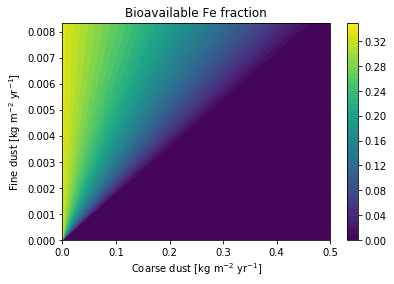

In [85]:
cf = plt.contourf(atm_coarse_dust_flux*gcm2s_to_kgm2yr,
                  atm_fine_dust_flux*gcm2s_to_kgm2yr,
                  bioavail_frac,
                  levels=np.arange(0,0.35+0.01,0.01))
plt.colorbar(cf)
h = plt.xlabel('Coarse dust [kg m$^{-2}$ yr$^{-1}$]')
h = plt.ylabel('Fine dust [kg m$^{-2}$ yr$^{-1}$]')
h = plt.title('Bioavailable Fe fraction')

xlm = plt.gca().get_xlim()
h = plt.xlim(xlm[0],0.5)
plt.savefig('fig/bioavail-fe-dust.png',dpi=300,bbox_inches='tight')

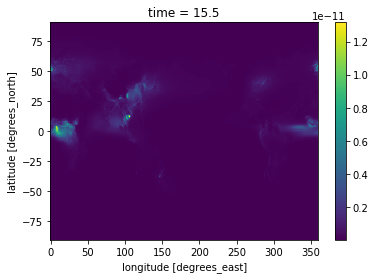

In [82]:
ATM_BLACK_CARBON_FLUX.isel(time=0).plot()

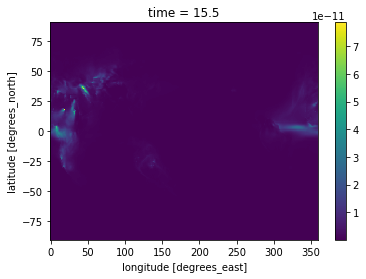

In [83]:
ATM_FINE_DUST_FLUX.isel(time=0).plot()

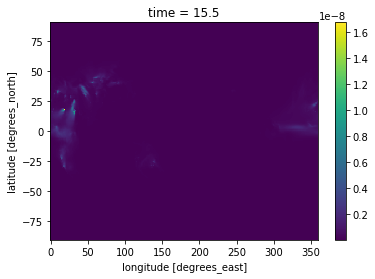

In [84]:
ATM_COARSE_DUST_FLUX.isel(time=0).plot()